In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("gas_turbines.csv")
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
data.shape

(15039, 11)

In [4]:
data.describe()



,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


In [5]:
X = data.iloc[:,0:3]
X.head()

,AT,AP,AH
0,6.8594,1007.9,96.799
1,6.7850,1008.4,97.118
2,6.8977,1008.8,95.939
3,7.0569,1009.2,95.249
4,7.3978,1009.7,95.150


In [6]:
y = data['TEY']

{'whiskers': [<matplotlib.lines.Line2D at 0x1c11a759040>,
 'caps': [<matplotlib.lines.Line2D at 0x1c11a815a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c11a7c9f40>],
 'medians': [<matplotlib.lines.Line2D at 0x1c11a7bb3d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c11a79aa60>],
 'means': []}

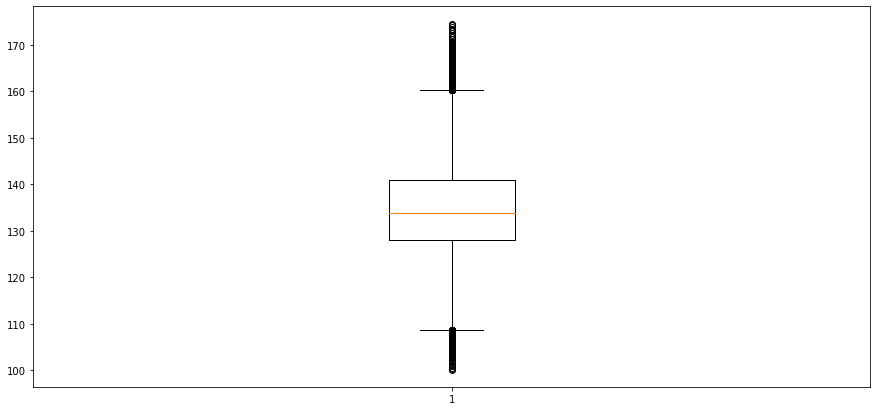

In [12]:
plt.figure(figsize=(15,7))
plt.boxplot(data['TEY'])

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
X_norm = sc.fit_transform(X)

y_array = np.array(y)
y_array.ndim
y_shape = np.reshape(y_array,(-1,1))
y_shape.ndim

y_norm = sc.fit_transform(y_shape)

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X_norm,y_norm,test_size=0.2,random_state=1)

In [ ]:
!pip install keras
!pip install tensorflow

In [ ]:
from keras.layers import Dense
from keras.models import Sequential

In [29]:
model = Sequential()
model.add(Dense(20,input_dim=3,activation='relu'))
model.add(Dense(12,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [33]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [34]:
model.fit(X_train,y_train,epochs=100,batch_size=20)

Epoch 1/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8904
Epoch 2/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8910
Epoch 3/100
602/602 [==============================] - 1s 1ms/step - loss: 0.8902
Epoch 4/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8902
Epoch 5/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8900
Epoch 6/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8902
Epoch 7/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8907
Epoch 8/100
602/602 [==============================] - 1s 2ms/step - loss: 0.8899
Epoch 9/100
602/602 [==============================] - 1s 1ms/step - loss: 0.8900
Epoch 10/100
602/602 [==============================] - 1s 1ms/step - loss: 0.8898
Epoch 11/100
602/602 [==============================] - 1s 1ms/step - loss: 0.8897
Epoch 12/100
602/602 [==============================] - 1s 1ms/step - loss: 0.8899
Epoch 13/100


In [35]:
y_pred = model.predict(X_test)

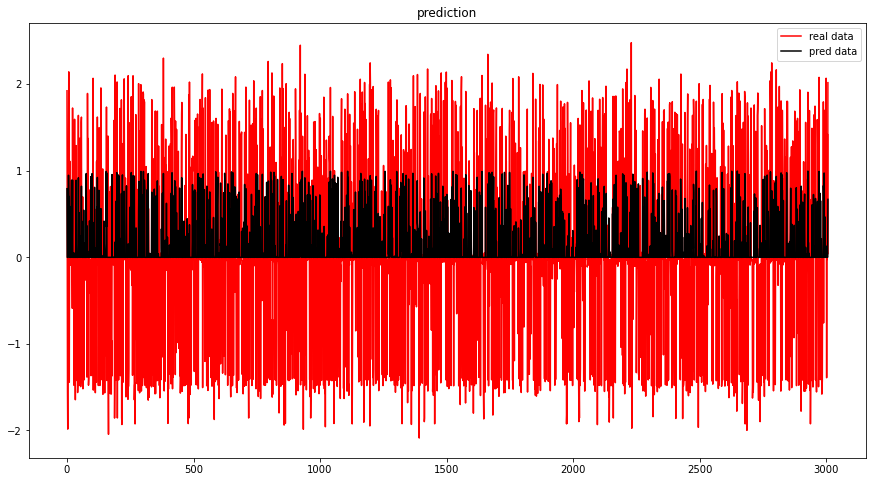

In [39]:

plt.figure(figsize=(15,8))

plt.plot(y_test,color='red',label='real data')
plt.plot(y_pred,color='black',label='pred data')
plt.title("prediction")
plt.legend()
plt.show()